# The Runge-Kutta method for ordinary differential equations

File RungeKutta.py contains a simple realization of Runge-Kutta method which is a numerial method for ODEs. 

For detailed description of this method, see [Wiki](https://en.wikipedia.org/wiki/Runge–Kutta_methods)

We provide a class named **RungeKutta** implementing this method. Specifically, this class solve ODEs like $$\frac{dy}{dt}=f\left(t,y\right)$$where $y$ and $f$ are k-dimensional vectors.

## How to init RungeKutta？

When initialize the RungeKutta class, parameters below are needed:
* T:       the end time, t ∈ [0,T]
* y0:      a numpy array, the initial point, k-dimensional. Notice that if k=1, you should also provide a 1-dimensional numpy array rather than a scalar.
* delta_t: step size of t

## Providing function $f$

To use the class, the function $f\left(t,y\right)$ should be provided, where $y$ is a k-dimensional vector and $f$ is $R^k$ valued.

To provide $f$, just override RungeKutta.f:

```python
ode_solver = RungeKutta(10, np.array([1.0]), 0.1)
ode_solver.f = f
```

Remember that f should have **3 inputs**:

* t:     a scalar, current t
* y:     k-dimensional numpy array, current y
* paras: some parameters needed in the computation of f

If parameters is needed when computing f, just override RungeKutta.params

## Iterate and Results:

After initializing and providing the function, just run **RungerKutta.iterate()** to compute the numerical path, and then get the paths by functions:

* get_paths: get the t array and the paths array, output:
    * t:     the t array
    * paths: k-by-len(t) numpy array of ODE result paths
* get_diff_paths: get the t array and the differenced paths array, output:
    * t:     the t array (with len(t)-1 dimension)
    * paths: k-by-(len(t)-1) numpy array of differenced ODE result paths

Here, we provide two examples:

## Example 1: Exponential function

We use codes below to compute the path of ODE:$$\frac{dy}{dt}=y$$ Simple calculation give the answer: $$y\left(t\right)=e^t+y_0-1$$

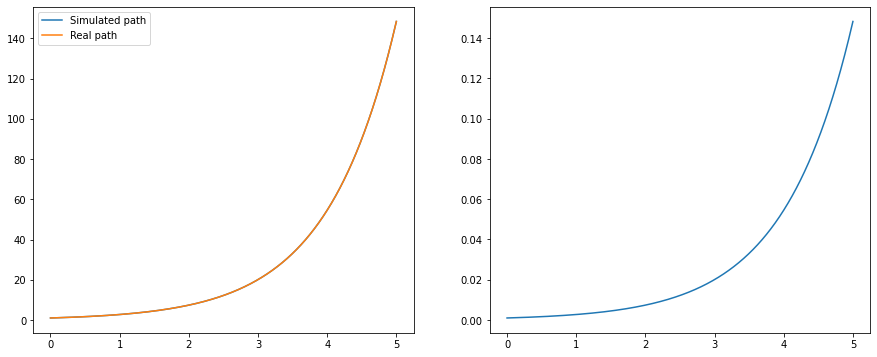

In [1]:
from RungeKutta import RungeKutta
import numpy as np

ode_solver = RungeKutta(5, np.array([1.0]), 0.001)

def f(t, y, params):
    return y

ode_solver.f = f
ode_solver.iterate()
t, path = ode_solver.get_paths()
t_diff, path_diff = ode_solver.get_diff_paths()

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 6.0)

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

ax1.plot(t, path.T, label = r'Simulated path')
ax1.plot(t, np.exp(t), label = r'Real path')
ax2.plot(t_diff, path_diff.T)
ax1.legend()

plt.show()

## Example 2: SIR model

The SIR model: $$\frac{dS}{dt}=-\beta\times S\times I$$  $$\frac{dI}{dt}=\beta\times S\times I-\gamma\times I$$  $$\frac{dR}{dt}=\gamma\times I$$ can be simulated by:

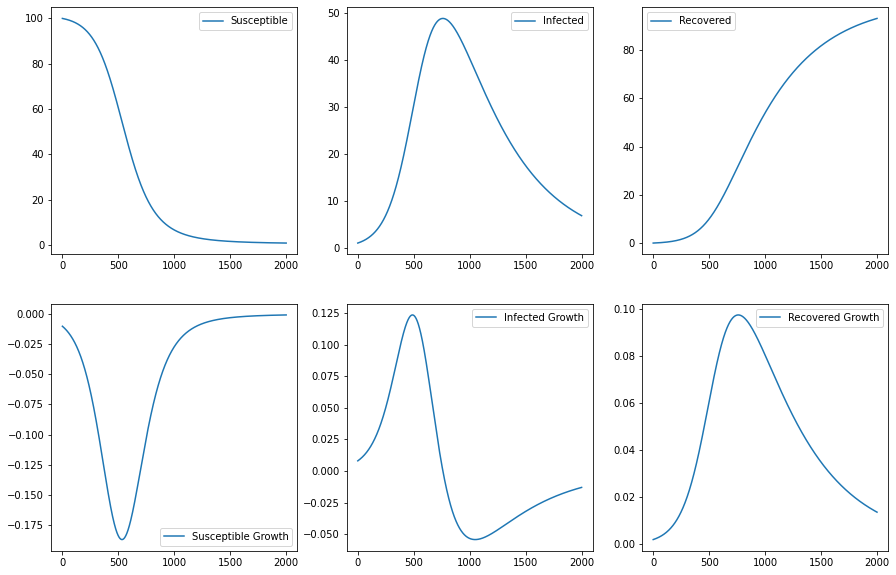

In [2]:
SIR_solver = RungeKutta(2000, np.array([100.0, 1, 0]), 1)
params = dict()
params['beta'] = 0.0001
params['gamma'] = 0.002
SIR_solver.params = params

def fSIR(t, y, params):
    # the array is [S,I,R]
    dS = -1 * params['beta'] * y[1] * y[0]
    dI = params['beta'] * y[1] * y[0] - params['gamma'] * y[1]
    dR = params['gamma'] * y[1]
    return np.array([dS, dI, dR])

SIR_solver.f = fSIR
SIR_solver.iterate()
t, paths = SIR_solver.get_paths()
t_diff, paths_diff = SIR_solver.get_diff_paths()

import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 10.0)

ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,3,4)
ax5 = plt.subplot(2,3,5)
ax6 = plt.subplot(2,3,6)

ax1.plot(t, paths[0,:].T, label = r'Susceptible')
ax2.plot(t, paths[1,:].T , label = r'Infected')
ax3.plot(t, paths[2,:].T , label = r'Recovered')
ax4.plot(t_diff, paths_diff[0,:].T, label = r'Susceptible Growth')
ax5.plot(t_diff, paths_diff[1,:].T , label = r'Infected Growth')
ax6.plot(t_diff, paths_diff[2,:].T , label = r'Recovered Growth')
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

plt.show()